# Customer Profiling and Segmentation

In this notebook, we will be using the recency, frequency and monetary value information of custumers to profile and segment them. Our choice of algorithm for this will be the K-Means clustering algorithm.

The K-Means clustering algorithm is a Machine Learning algorithm that attempts to split a given data set into a fixed number (K) of clusters. The following example image shows how an unsegmented dataset gets segmented using the K-Means clustering algorithm when the number of clusters are properly specified: 

<img src = "images/kmeans_clustering.png" width="500">

We will require the scikit-learn library to use the **K-Means Clustering algorithm**. You can install the library using the following command:

In [49]:
# !pip install scikit-learn

Now, let us start by importing the necessary libraries,

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

Next, importing the CSV file called `user_dataset.csv` which contains information about the recency, frequency and monetary value of customers.

In [2]:
# Read the CSV data as a Pandas DataFrame
user_df = pd.read_csv('data/user_dataset.csv')

In [3]:
# Looking at the first five rows
user_df.head()

,CustomerID,Recency,Frequency,AmountSpent
0,18074,373,13,489.60
1,13747,373,1,79.60
2,12791,373,2,192.60
3,17908,373,58,243.28
4,16583,373,14,233.45


In [4]:
# Printing the shape of the DataFrame
user_df.shape

(4372, 4)

Next, let us initiate the K-Means clustering algorithm with a total number of 4 clusters. 

Note that, there are different methods to determine how many clusters should be made in a dataset but we will not get into that for now.

In [5]:
# Build 4 clusters 
kmeans = KMeans(n_clusters=4)

### Segmenting Customers based on Recency

We will now fit the model object into the recency values in our dataframe.

In [6]:
kmeans.fit(user_df[['Recency']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Predicting the value of clusters and saving them as a new column `RecencyCluster` in the dataframe.

In [7]:
user_df['RecencyCluster'] = kmeans.predict(user_df[['Recency']])

In [8]:
user_df.head()

,CustomerID,Recency,Frequency,AmountSpent,RecencyCluster
0,18074,373,13,489.60,1
1,13747,373,1,79.60,1
2,12791,373,2,192.60,1
3,17908,373,58,243.28,1
4,16583,373,14,233.45,1


We have now segmented our customers based on **Recency** into 4 different clusters. Let us now see the distribution of data in the 4 clusters.

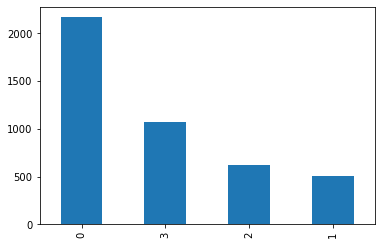

In [12]:
user_df['RecencyCluster'].value_counts().plot.bar()

We can see that the data has been distributed into different clusters namely 0, 1, 2, and 3. However, the K-Means Algorithm does not differentiate the ranking of clusters based on their order. We will hence order them using the code below.

In [ ]:
# Ordering cluster numbers
def order_cluster(cluster_name, column_name, df, ascending):
    """
    Ranking clusters based on their values.
    """
    # Group the dataframe based on different cluster values and find the mean
    df_new = df.groupby(cluster_name)[column_name].mean().reset_index()
    # 
    df_new = df_new.sort_values(by=column_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_name,'index']], on=cluster_name)
    df_final = df_final.drop([cluster_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_name})
    return df_final

In [ ]:
df_user = order_cluster('RecencyCluster', 'Recency', df_user, False)

Lets see how our data looks like now.

In [ ]:
df_user.groupby('RecencyCluster')['Recency'].describe()

We can clearly see that the data is more understandable now.

### Segmenting Customers based on Frequency

We will now fit the model object into the frequency values in our dataframe.

In [29]:
kmeans.fit(df_user[['Frequency']])

Predicting the value of clusters and saving them as a new column `FrequencyCluster` in the dataframe.

In [29]:
df_user['FrequencyCluster'] = kmeans.predict(df_user[['Frequency']])

In [ ]:
# Order the frequency cluster
df_user = order_cluster('FrequencyCluster', 'Frequency',df_user,True)

# See details of each cluster
df_user.groupby('FrequencyCluster')['Frequency'].describe()

### Segmenting Customers based on Revenue

We will now fit the model object into the revenue values in our dataframe.

In [ ]:
kmeans.fit(df_user[['AmountSpent']])

Predicting the value of clusters and saving them as a new column `RevenueCluster` in the dataframe.

In [ ]:
df_user['RevenueCluster'] = kmeans.predict(df_user[['AmountSpent']])

In [ ]:
# Order the cluster numbers
df_user = order_cluster('RevenueCluster', 'AmountSpent',df_user,True)

# Show details of the dataframe
df_user.groupby('RevenueCluster')['AmountSpent'].describe()

Finally, we will combine all three values of clusters to compute the overall RFM Score of each of the customers.

In [ ]:
# Calculate overall score
df_user['OverallScore'] = df_user['RecencyCluster'] + df_user['FrequencyCluster'] + df_user['RevenueCluster']
df_user.groupby('OverallScore')['Recency','Frequency','AmountSpent'].mean()

In [ ]:
df_user.head()

## Segmenting Customers based on Overall Score

We will now segment the customers into three groups based on overall score.

In [ ]:
# Segment the customers based on overall score
df_user['Segment'] = 'Low-Value'
df_user.loc[df_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
df_user.loc[df_user['OverallScore']>4,'Segment'] = 'High-Value' 

### Plot the segmentation 

#### Frequency vs Total amount


In [ ]:
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Frequency'],
        y=df_user.query("Segment == 'Low-Value'")['Total_amount'])

plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Frequency'],
        y=df_user.query("Segment == 'Mid-Value'")['Total_amount'])

plt.scatter(x=df_user.query("Segment == 'High-Value'")['Frequency'],
        y=df_user.query("Segment == 'High-Value'")['Total_amount'])

#### Recency vs Total amount


In [ ]:
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Recency'],
        y=df_user.query("Segment == 'Low-Value'")['Total_amount'])

plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Recency'],
        y=df_user.query("Segment == 'Mid-Value'")['Total_amount'])

plt.scatter(x=df_user.query("Segment == 'High-Value'")['Recency'],
        y=df_user.query("Segment == 'High-Value'")['Total_amount'])

#### Recency vs Frequency


In [ ]:
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Recency'],
        y=df_user.query("Segment == 'Low-Value'")['Frequency'])

plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Recency'],
        y=df_user.query("Segment == 'Mid-Value'")['Frequency'])

plt.scatter(x=df_user.query("Segment == 'High-Value'")['Recency'],
        y=df_user.query("Segment == 'High-Value'")['Frequency'])

#### Total amount vs Frequency

In [ ]:
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Total_amount'],
        y=df_user.query("Segment == 'Low-Value'")['Frequency'])

plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Total_amount'],
        y=df_user.query("Segment == 'Mid-Value'")['Frequency'])

plt.scatter(x=df_user.query("Segment == 'High-Value'")['Total_amount'],
        y=df_user.query("Segment == 'High-Value'")['Frequency'])

Hence, we've successfully segmented our customers and these segments can now help us in various processes of building the business such as sales and marketing.